c:\Users\User\Desktop\uni\Tesi\neural-astar\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
    

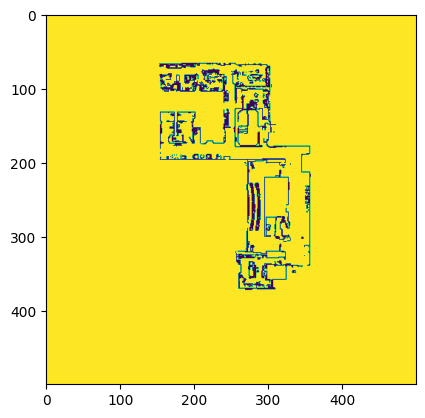

In [1]:

from neural_astar.utils.data_maps import create_dataloader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

dataset = create_dataloader('C:/Users/User/Desktop/uni/Tesi/neural-astar/src/neural_astar/utils/voronoi_utilities/maps_data/maps', 'train_resized', 5)
map_design, s, g, t = next(iter(dataset))

plt.imshow(map_design[0][0])
print(map_design)



tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.uint8)
(500, 500)


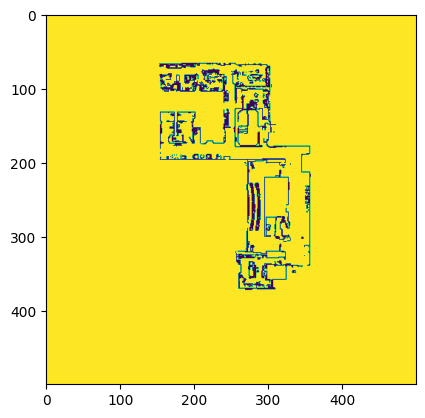

In [5]:
import torch
import numpy as np
img = Image.open('C:/Users/User/Desktop/uni/Tesi/neural-astar/src/neural_astar/utils/voronoi_utilities/maps_data/maps/train_resized/area2_floor_0.png')
gray_image = img.convert("L")

# Applica una soglia per ottenere un'immagine binaria
threshold = 128
binary_image = gray_image.point(lambda p: p > threshold and 1)

# Converti l'immagine binaria in un array numpy
binary_array = np.array(binary_image, dtype=np.uint8)

plt.imshow(torch.from_numpy(binary_array))
print(torch.from_numpy(binary_array))
print(binary_array.shape)

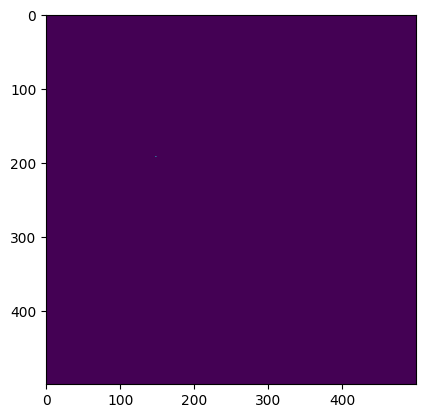

In [20]:
plt.imshow(g[0][0])

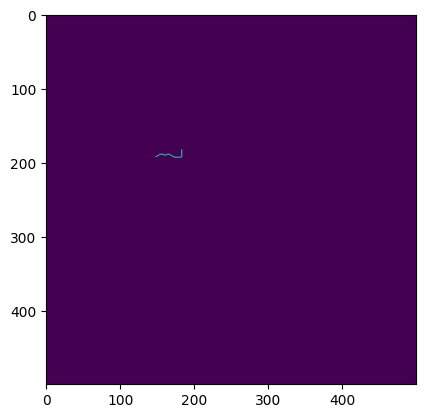

In [21]:
plt.imshow(t[0][0])